# Markov chain receptor models 

## Symbolic vertex and edge labels

Recall the three-state receptor model [three-state receptor model](receptors:three_state_model) discussed earlier.

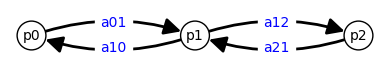

In [1]:
var('p0 p1 p2 a01 a10 a12 a21')
G=graphs.PathGraph(3).to_directed()
G.relabel({0:p0,1:p1,2:p2})
G.set_edge_label(p0,p1,a01)
G.set_edge_label(p1,p0,a10)
G.set_edge_label(p1,p2,a12)
G.set_edge_label(p2,p1,a21)
G.show(figsize=4,edge_labels=True,talk=True)

We assign symbolic variables to the vertices and edges of $G$ because this allows us to produce symbolic expressions important quantities using methods available in `Sagemath`'s [module for graphs and digraphs](https://doc.sagemath.org/html/en/reference/graphs/index.html). For example, the weighted adjacency matrix associated with graph $G$ above is

In [2]:
A = G.weighted_adjacency_matrix()

The combinatorial Laplacian matrix is $L=D-A$ where $D$ is a diagonal matrix given by the column sum of $A$.

In [3]:
L = diagonal_matrix(sum(A.T))-A
show(L)

[      a01      -a01         0]
[     -a10 a10 + a12      -a12]
[        0      -a21       a21]

```{note}
In the code block above, I prefer to write ```sum(A.T)``` rather than ```sum(A.columns())```, but these are equal.
```

In [4]:
sum(A.T) == sum(A.columns())

True

## Generator matrix of Markov chain 

The Markov chain with states and transistions of $G$ has a generator matrix $Q$ that is the opposite (additive inverse) of the Laplacian matrix ($L$). That is, $Q=-L=A-D$. We define a function that calculates the symbolic generator matrix $Q$ from the weighted adjacency matrix $A$.

In [5]:
def generator(A):
    return A-diagonal_matrix(sum(A.T))

Calling the function ```generator()``` gives the result we expect:

In [6]:
Q = generator(A)
show(Q)

[      -a01        a01          0]
[       a10 -a10 - a12        a12]
[         0        a21       -a21]

Note that the sums of the columns are zero, reflecting the conservation of probability.

In [7]:
sum(Q.columns()) == sum(Q.T)

True

## Markov chain tree theorem (Hill's diagrammatic method)

Using the Markov chain tree theorem \(CHECK\), it is straightforward to find symbolic expressions for the steady\-state probabilities of each state \(p0,p1,p2\).  The relative probabilities are:

In [8]:
z0 = Q[[1,2],[1,2]].determinant().simplify_full()
z1 = Q[[0,2],[0,2]].determinant().simplify_full()
z2 = Q[[0,1],[0,1]].determinant().simplify_full()
print(f'[ {z0} : {z1} : {z2}]')

[ a10*a21 : a01*a21 : a01*a12]


The normalized probabilities are:

In [9]:
zT = z0+z1+z2
p0 = z0/zT
p1 = z1/zT
p2 = z2/zT
show(table([[f'{p0=}'],[f'{p1=}'],[f'{p2=}']]))

p0=a10*a21/(a01*a12 + a01*a21 + a10*a21)
p1=a01*a21/(a01*a12 + a01*a21 + a10*a21)
p2=a01*a12/(a01*a12 + a01*a21 + a10*a21)


This calculation can be peformed for a Markov chain whose topology is a simple directed graph (connected, no loops) that is also symmetric.

In [10]:
def hill_diagramatic_method(Q):
    n = Q.nrows()
    if Q.ncols() != n:
        raise ValueError
    z = [0]*n
    for i in range(n):
        a = [ j for j in range(n) ]
        a.remove(i)
        z[i] = Q[a,a].determinant().simplify_full()
    return z

G=graphs.HouseGraph().to_directed()
# put values on each edge ... 
zz = hill_diagramatic_method(Q)
print(zz)

[a10*a21, a01*a21, a01*a12]


In [11]:
# define this? G.weighted_laplacian_matrix()